In [1]:
import pystan

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [3]:
%%time
random_state = np.random.RandomState(seed=131)
m = 2.43
b = 43.44
sigma = 15
N = 16
x = np.linspace(0,100,N)
y_real = m * x + b
err = random_state.randn(N) * sigma
y_obs = y_real + err

Wall time: 0 ns


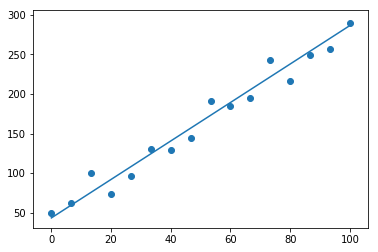

In [4]:
plt.plot(x, y_real, c='C0')
plt.scatter(x, y_obs, c='C0')

In [5]:
stan_code = """
data {
    int N;
    vector[N] y;
    vector[N] x;
}
parameters {
    real b;
    real m;
    real<lower=0> sigma;
}
transformed parameters {
    real<lower=0> inv_sigma;
    inv_sigma = 1/sigma;
}
model {
    inv_sigma ~ normal(0,1);
    y ~ normal(m * x + b, sigma);
}
generated quantities {
    vector[N] log_lik;
    vector[N] y_hat;
    for (n in 1:N) {
        log_lik[n] = normal_lpdf(y[n] | m*x[n]+b, sigma);
        y_hat[n] = normal_rng(m*x[n]+b, sigma);
    }
}
"""

In [6]:
%%time
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_561b4c9d0d40548a4f9c24509ace6db0 NOW.


Wall time: 42.3 s


In [7]:
stan_data = dict(
    N = N,
    x = x,
    y = y_obs,
)

In [8]:
%%time
stan_fit = stan_model.sampling(data=stan_data, iter=5000, warmup=3000)

Wall time: 4.04 s


In [9]:
%%time
inference_data = az.pystan_to_inference_data(fit=stan_fit, 
                                             posterior_predictive='y_hat', 
                                             observed_data=['y'], 
                                             log_likelihood='log_lik'
                                            )

Wall time: 24.1 ms


Wall time: 227 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228427D85F8>,
      dtype=object)

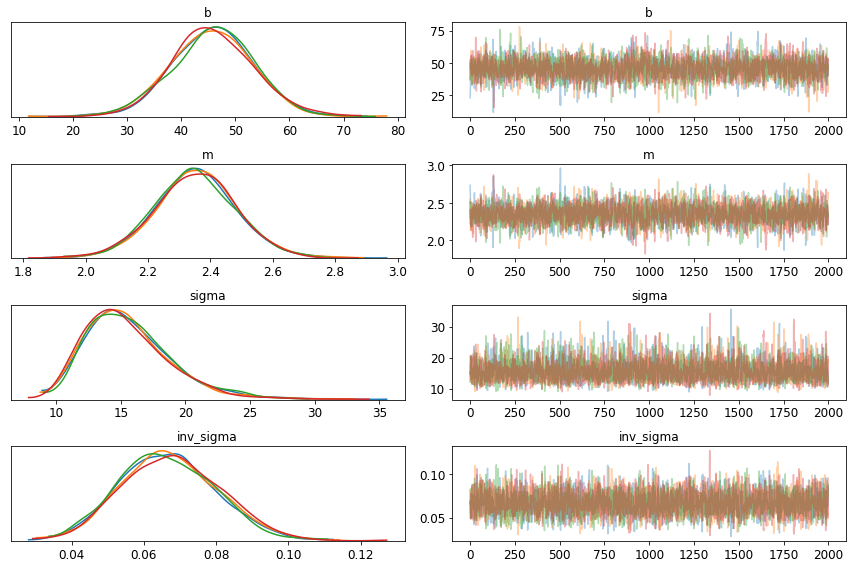

In [10]:
%%time
az.traceplot(inference_data)

Wall time: 87 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000228429F4EF0>,
      dtype=object)

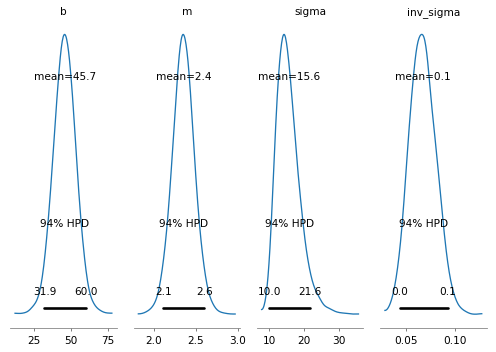

In [11]:
%%time
az.posteriorplot(inference_data)

Wall time: 84.2 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022843A8D198>],
      dtype=object)

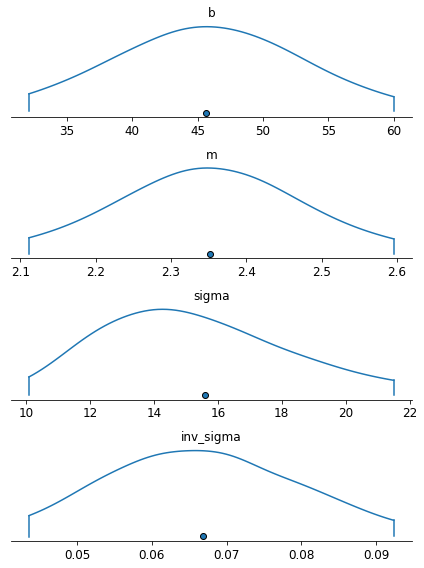

In [12]:
%%time
az.densityplot(inference_data)

Wall time: 172 ms


C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


(<Figure size 720x504 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022843E6EDA0>,
       dtype=object))

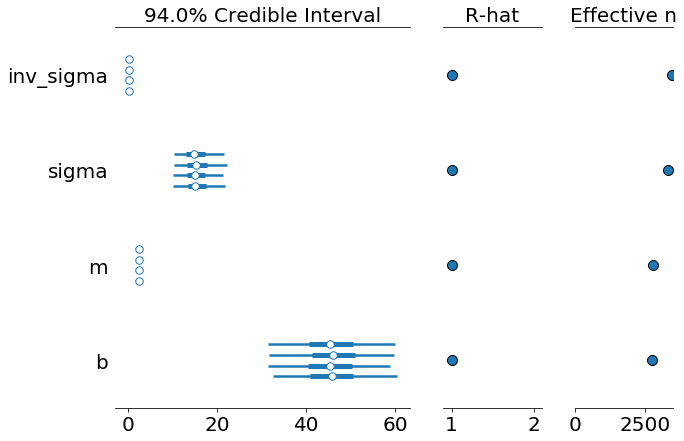

In [13]:
%%time
az.forestplot(inference_data)

Wall time: 271 ms


C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


(<Figure size 720x504 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022843FCC0F0>,
       dtype=object))

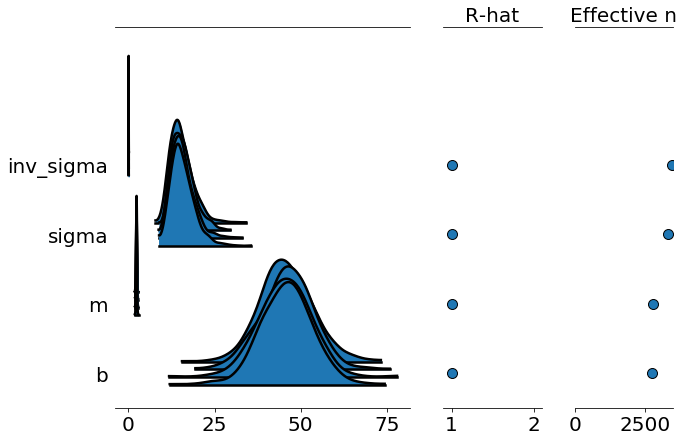

In [14]:
%%time
az.forestplot(inference_data, kind='ridgeplot')

Wall time: 72.1 ms


C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


(<Figure size 1008x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022843F6FC50>,
       dtype=object))

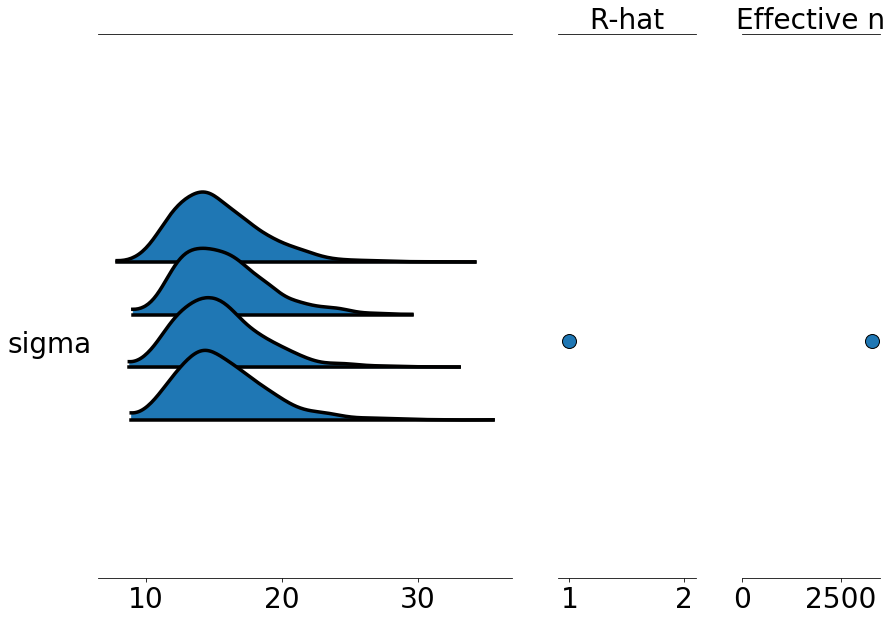

In [15]:
%%time
az.forestplot(inference_data, var_names=['sigma'], kind='ridgeplot', figsize=(14,10), ridgeplot_overlap=0.2)

Wall time: 200 ms


C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228414162B0>,
      dtype=object)

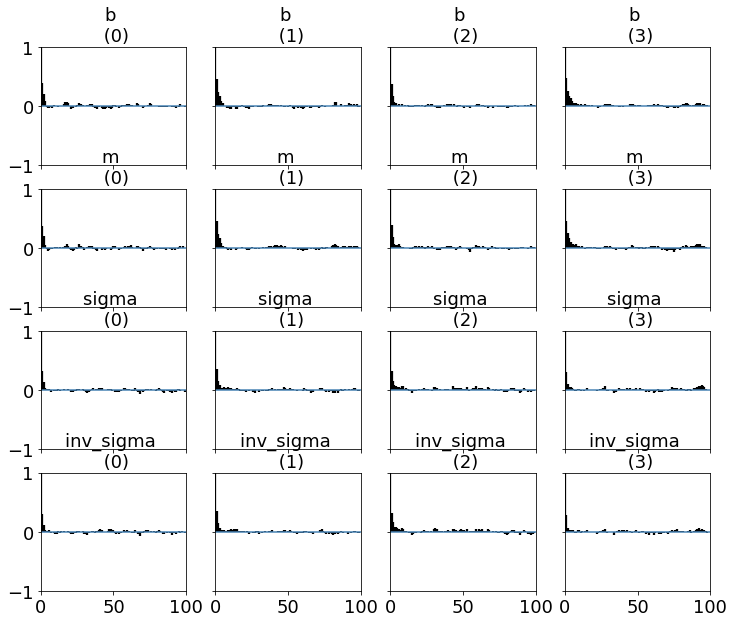

In [16]:
%%time
az.autocorrplot(inference_data);

Wall time: 31.3 ms


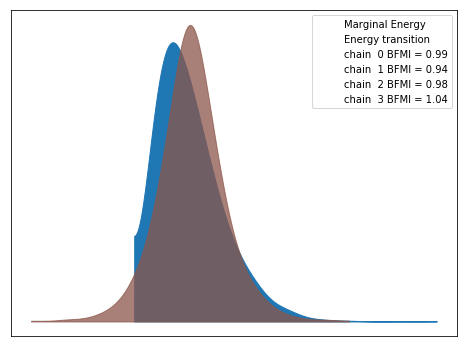

In [17]:
%%time
az.energyplot(inference_data)

Wall time: 46.8 ms


(<matplotlib.axes._axes.Axes at 0x228414165c0>,
 <matplotlib.axes._axes.Axes at 0x22845529cf8>)

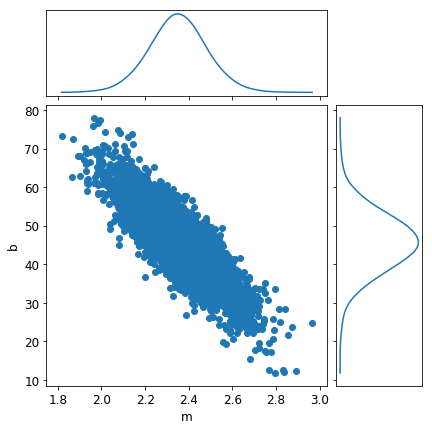

In [18]:
%%time
az.jointplot(inference_data, var_names=['m', 'b'])

Wall time: 46.8 ms


(<matplotlib.axes._axes.Axes at 0x228455a04a8>,
 <matplotlib.axes._axes.Axes at 0x22845602eb8>)

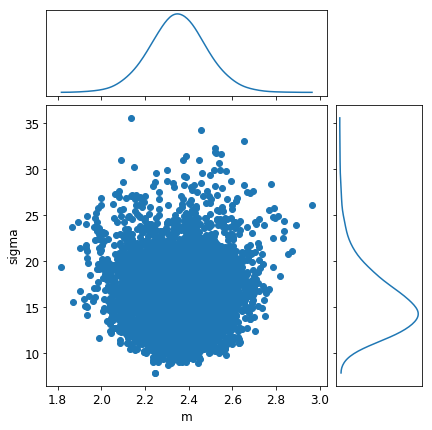

In [19]:
%%time
az.jointplot(inference_data, var_names=['m', 'sigma'])

Wall time: 48.1 ms


(<matplotlib.axes._axes.Axes at 0x2284568a6a0>,
 <matplotlib.axes._axes.Axes at 0x228456d7518>)

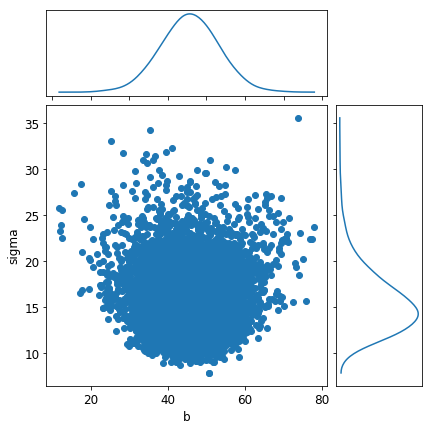

In [20]:
%%time
az.jointplot(inference_data, var_names=['b', 'sigma'])

Wall time: 79.5 ms


c:\users\aohartik\github\arviz\arviz\plots\kdeplot.py:231: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)


(<matplotlib.axes._axes.Axes at 0x22845750b00>,
 <matplotlib.axes._axes.Axes at 0x228457b2048>)

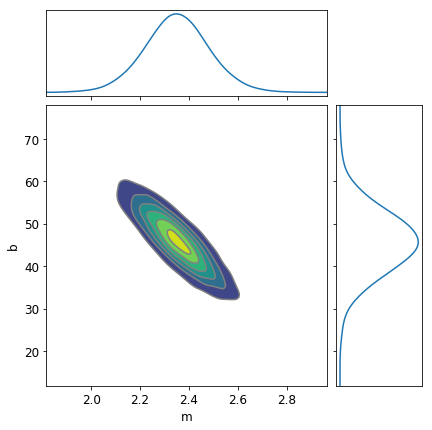

In [21]:
%%time
az.jointplot(inference_data, var_names=['m', 'b'], kind='kde', fill_last=False)

Wall time: 106 ms


(<matplotlib.axes._axes.Axes at 0x22845c33f28>,
 <matplotlib.axes._axes.Axes at 0x22845cb1f98>)

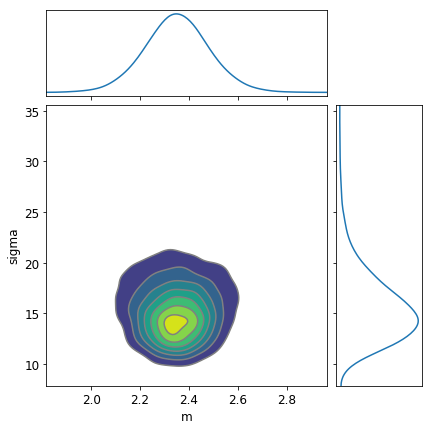

In [22]:
%%time
az.jointplot(inference_data, var_names=['m', 'sigma'], kind='kde', fill_last=False)

Wall time: 153 ms


c:\users\aohartik\github\arviz\arviz\plots\kdeplot.py:231: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)


(<matplotlib.axes._axes.Axes at 0x22845d1d668>,
 <matplotlib.axes._axes.Axes at 0x228461d9748>)

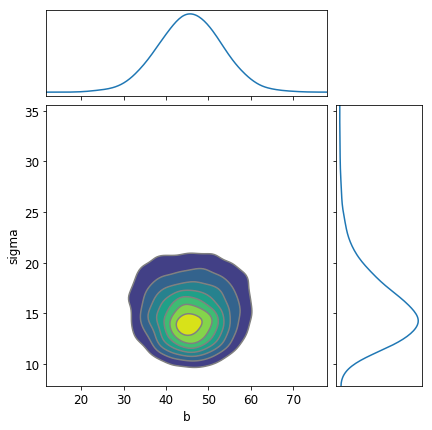

In [23]:
%%time
az.jointplot(inference_data, var_names=['b', 'sigma'], kind='kde', fill_last=False)

In [24]:
%%time
az.gelman_rubin(inference_data)

Wall time: 4 ms


c:\users\aohartik\github\arviz\arviz\stats\diagnostics.py:234: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  target[idxs] = _get_rhat(ary[idxs])


<xarray.Dataset>
Dimensions:    ()
Data variables:
    b          float64 1.0
    m          float64 1.0
    sigma      float64 1.0
    inv_sigma  float64 1.0

In [25]:
%%time
# ?
az.r2_score(inference_data.posterior_predictive.y_hat, inference_data.observed_data.y)

Wall time: 52 ms


r2        <xarray.DataArray ()>\narray(0.330334)
r2_std          <xarray.DataArray ()>\narray(0.)
dtype: object

In [26]:
%%time
az.loo(inference_data)

Wall time: 40 ms


c:\users\aohartik\github\arviz\arviz\stats\diagnostics.py:115: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  target[idxs] = _get_neff(ary[idxs])
C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,loo,loo_se,p_loo,warning
0,134.178847,4.108837,2.241187,0


In [27]:
%%time
loo_res = az.loo(inference_data, pointwise=True)
loo_res

Wall time: 36 ms


c:\users\aohartik\github\arviz\arviz\stats\diagnostics.py:115: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  target[idxs] = _get_neff(ary[idxs])
C:\Users\aohartik\miniconda3\envs\stan\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Wall time: 20 ms


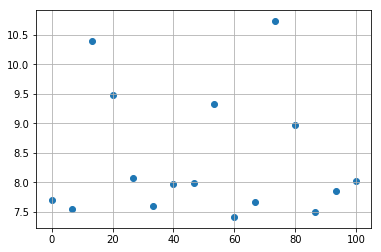

In [28]:
%%time
plt.scatter(x, loo_res['loo_i'].values[0])
plt.grid()

KeyError: 'y'
Wall time: 15.6 ms


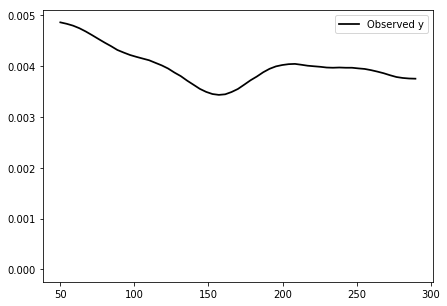

In [29]:
%%time
try:
    az.ppcplot(inference_data)
except KeyError as e:
    print("KeyError:", e)

In [30]:
%%time
inference_data.observed_data.rename(name_dict={'y' : 'y_hat'}, inplace=True)

Wall time: 0 ns


<xarray.Dataset>
Dimensions:  (y_dim_0: 16)
Coordinates:
  * y_dim_0  (y_dim_0) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    y_hat    (y_dim_0) float64 50.19 61.9 99.59 73.22 97.02 130.2 128.8 ...

Wall time: 3min 6s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022847346390>],
      dtype=object)

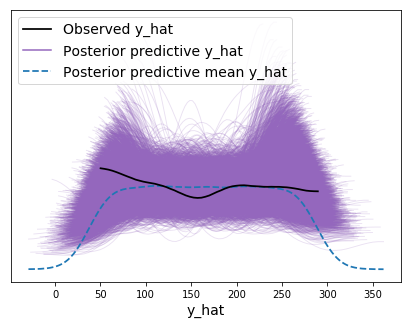

In [31]:
%%time
az.ppcplot(inference_data)

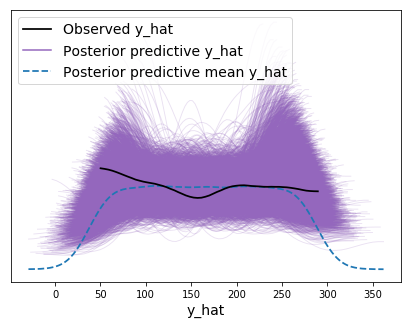

         161921894 function calls (161505216 primitive calls) in 227.146 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16005   50.743    0.003   85.228    0.005 _base.py:2448(<listcomp>)
128264124   34.485    0.000   34.485    0.000 artist.py:940(sticky_edges)
    16005   31.553    0.002   31.553    0.002 _base.py:2449(<listcomp>)
    16005   29.708    0.002   29.708    0.002 _base.py:2450(<listcomp>)
    40013   19.287    0.000   19.326    0.000 {built-in method builtins.sum}
   224076    3.872    0.000    3.872    0.000 {method 'extend' of 'list' objects}
   680315    3.130    0.000    3.130    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    16005    2.897    0.000  191.654    0.012 _base.py:2423(autoscale_view)
1000784/984779    1.984    0.000    4.127    0.000 {built-in method numpy.core.multiarray.array}
     8002    1.875    0.000  106.570    0.013 _axes.py:4981(fill_between)
     8003    1.380    0.000  10

In [33]:
%%prun
az.ppcplot(inference_data)